In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

import graphviz
import pydotplus
from graphviz import Digraph

## Mesures de discrimination

### Courbes des différentes mesures de discrimination

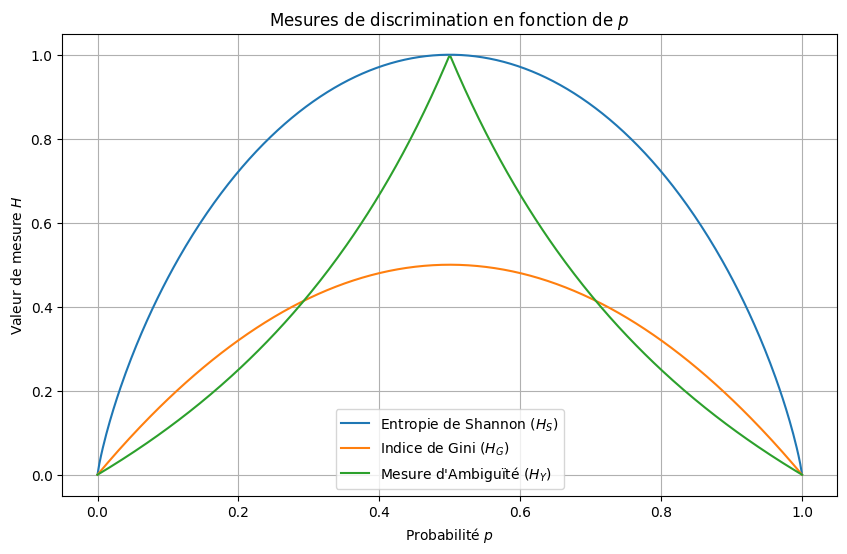

In [3]:
# Fonction pour calculer l'entropie de Shannon
def entropie(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Fonction pour calculer l'indice de Gini
def gini(p):
    return 2 * p * (1 - p)

# Fonction pour calculer la mesure d'ambiguïté
def ambiguite(p):
    if p > 1 / 2:
        return np.log2(2) * (1 - p) / p
    else:
        return np.log2(2) * p / (1 - p)

# Générer des valeurs de probabilité p entre 0 et 1
valeurs_p = np.linspace(0, 1, 400)

# Calculer les valeurs des mesures pour chaque p
valeurs_entropie = [entropie(p) for p in valeurs_p]
valeurs_gini = [gini(p) for p in valeurs_p]
valeurs_ambiguite = [ambiguite(p) for p in valeurs_p]

plt.figure(figsize=(10, 6))

plt.plot(valeurs_p, valeurs_entropie, label="Entropie de Shannon ($H_S$)")
plt.plot(valeurs_p, valeurs_gini, label="Indice de Gini ($H_G$)")
plt.plot(valeurs_p, valeurs_ambiguite, label="Mesure d'Ambiguïté ($H_Y$)")

plt.title("Mesures de discrimination en fonction de $p$")
plt.xlabel("Probabilité $p$")
plt.ylabel("Valeur de mesure $H$")
plt.legend()
plt.grid(True)
plt.show()

### Comparatif des mesures de discrimitation

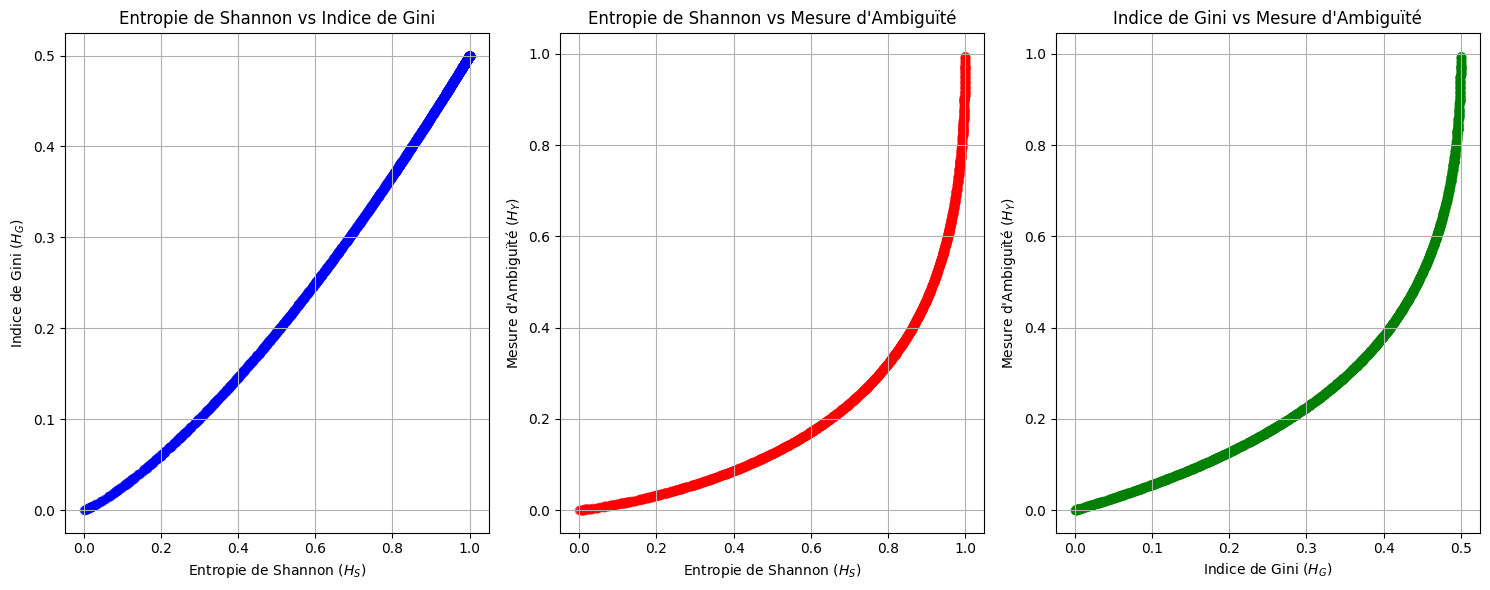

In [4]:
nb_echantillons = 2000

valeurs_p_aleatoires = [random.uniform(0, 1) for _ in range(nb_echantillons)]
mesures = [(entropie(p), gini(p), ambiguite(p)) for p in valeurs_p_aleatoires]
entropie_samples, gini_samples, ambiguïté_samples = zip(*mesures)

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Shannon vs Gini
axs[0].scatter(entropie_samples, gini_samples, color="blue", alpha=0.5)
axs[0].set_title("Entropie de Shannon vs Indice de Gini")
axs[0].set_xlabel("Entropie de Shannon ($H_S$)")
axs[0].set_ylabel("Indice de Gini ($H_G$)")
axs[0].grid(True)

# Shannon vs Ambiguïté
axs[1].scatter(entropie_samples, ambiguïté_samples, color="red", alpha=0.5)
axs[1].set_title("Entropie de Shannon vs Mesure d'Ambiguïté")
axs[1].set_xlabel("Entropie de Shannon ($H_S$)")
axs[1].set_ylabel("Mesure d'Ambiguïté ($H_Y$)")
axs[1].grid(True)

# Gini vs Ambiguïté
axs[2].scatter(gini_samples, ambiguïté_samples, color="green", alpha=0.5)
axs[2].set_title("Indice de Gini vs Mesure d'Ambiguïté")
axs[2].set_xlabel("Indice de Gini ($H_G$)")
axs[2].set_ylabel("Mesure d'Ambiguïté ($H_Y$)")
axs[2].grid(True)

plt.tight_layout()
plt.show()

### Étude des résultats obtenus

L'indice de Gini montre une forte corrélation positive avec l'entropie de Shannon, suggérant une relation linéaire. La corrélation entre l'entropie de Shannon et la mesure d'ambiguïté est significative, avec une croissance exponentielle. De même, l'indice de Gini est fortement corrélé à la mesure d'ambiguïté. La dispersion limitée des points indique des relations claires entre les mesures. À noter que malgré l'augmentation du nombre de classes, l'indice de Gini et l'entropie de Shannon maintiennent une forte corrélation, bien que la dispersion augmente lors de la comparaison avec la mesure d'ambiguïté.

## Arbres de décision en présence de données symboliques

### Arbre de décision sur les données digits

In [5]:
# Charger le jeu de données Digits
digits = datasets.load_digits()

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2
)

# Construire et entraîner l'arbre de décision avec l'entropie de Shannon comme critère
tree_digits = tree.DecisionTreeClassifier(criterion="entropy")
tree_digits.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = tree_digits.predict(X_test)

# Évaluer la précision de l'arbre de décision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision de l'arbre de décision: {accuracy * 100:.4f}%")

Précision de l'arbre de décision: 83.6111%


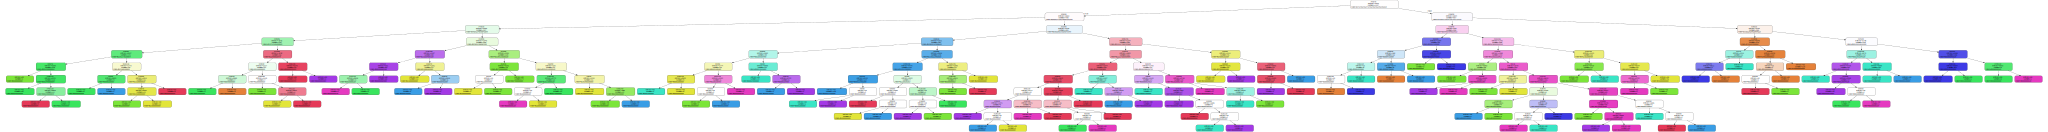

In [6]:
dot_digits = tree.export_graphviz(tree_digits, out_file=None, filled=True, rounded=True, special_characters=True)
graph_digits = graphviz.Source(dot_digits)

graph_digits.render("digits")
graph_digits

### Arbre de décision sur les données elections

In [7]:
elections_df = pd.read_csv("./data/elections.csv")
elections_df

,Adresse,Majeur?,Nationalite,Label
0,Paris,oui,Francais,1
1,Paris,non,Francais,-1
2,Montpellier,oui,Italien,1
3,Paris,oui,Suisse,-1
4,Strasbourg,non,Italien,-1
5,Strasbourg,non,Francais,-1
6,Strasbourg,oui,Francais,1
7,Montpellier,oui,Suisse,-1


In [8]:
elections_encoded = pd.get_dummies(elections_df)
elections_encoded

,Label,Adresse_Montpellier,Adresse_Paris,Adresse_Strasbourg,Majeur?_non,Majeur?_oui,Nationalite_Francais,Nationalite_Italien,Nationalite_Suisse
0,1,0,1,0,0,1,1,0,0
1,-1,0,1,0,1,0,1,0,0
2,1,1,0,0,0,1,0,1,0
3,-1,0,1,0,0,1,0,0,1
4,-1,0,0,1,1,0,0,1,0
5,-1,0,0,1,1,0,1,0,0
6,1,0,0,1,0,1,1,0,0
7,-1,1,0,0,0,1,0,0,1


In [11]:
# Séparation des features et des labels
X = elections_encoded.drop("Label", axis=1)
y = elections_encoded["Label"]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Construction de l'arbre de décision avec l'entropie comme critère
tree_elections = tree.DecisionTreeClassifier(criterion="entropy")
tree_elections.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_elections = tree_elections.predict(X_test)

# Évaluation de la précision de l'arbre de décision
accuracy_elections = accuracy_score(y_test, y_pred_elections)
print(f"Précision de l'arbre de décision: {accuracy_elections * 100:.4f}%")

Précision de l'arbre de décision: 100.0000%


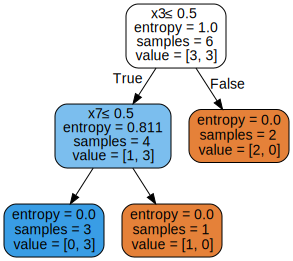

In [12]:
dot_elections = tree.export_graphviz(tree_elections, out_file=None, filled=True, rounded=True, special_characters=True)
graph_elections = graphviz.Source(dot_elections)

graph_elections.render("digits")
graph_elections

### Algorithme de création d'arbres de décision adaptée aux données symboliques.

In [13]:
from collections import Counter


class Node:
    def __init__(
        self,
        feature=None,
        value=None,
        left=None,
        right=None,
        result=None,
        entropy=None,
    ):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.result = result
        self.entropy = entropy


class SymbolicDecisionTree:
    def __init__(self):
        self.tree = None
        self.data = None

    def fit(self, X, y):
        training_data = pd.concat([X, y], axis=1)
        self.data = training_data
        self.tree = self.build_tree(training_data)

    def predict(self, X):
        predictions = [self.predict_single_entry(entry) for _, entry in X.iterrows()]
        return predictions

    def predict_xai(self, entry):
        explanation, _ = self.trace_tree(entry, self.tree, explanation=[])
        return explanation

    def build_tree(self, data):

        if len(data) == 0:
            return Node()

        current_uncertainty = self.gini(data.iloc[:, -1])

        best_gain = 0
        best_criteria = None
        best_sets = None

        feature_count = len(data.columns) - 1

        for col in range(feature_count):
            feature_values = data.iloc[:, col].unique()
            for val in feature_values:
                partitioned_data = self.partition(data, data.columns[col], val)

                p = float(partitioned_data[0].shape[0]) / data.shape[0]
                gain = (
                    current_uncertainty
                    - p * self.gini(partitioned_data[0].iloc[:, -1])
                    - (1 - p) * self.gini(partitioned_data[1].iloc[:, -1])
                )

                if (
                    gain > best_gain
                    and len(partitioned_data[0]) > 0
                    and len(partitioned_data[1]) > 0
                ):
                    best_gain = gain
                    best_criteria = (data.columns[col], val)
                    best_sets = partitioned_data

        if best_gain > 0:
            left = self.build_tree(best_sets[0])
            right = self.build_tree(best_sets[1])
            return Node(
                feature=best_criteria[0],
                value=best_criteria[1],
                left=left,
                right=right,
                entropy=current_uncertainty,
            )
        else:
            outcome = data.iloc[:, -1].value_counts().idxmax()
            return Node(result=outcome, entropy=current_uncertainty)

    def predict_single_entry(self, entry):
        node = self.tree
        while node.result is None:
            if entry[node.feature] == node.value:
                node = node.left
            else:
                node = node.right
        return node.result

    def trace_tree(self, entry, node, explanation):
        if node.result is not None:
            return explanation, node.result

        if entry[node.feature] == node.value:
            explanation.append(f"{node.feature} == {node.value}")
            return self.trace_tree(entry, node.left, explanation)
        else:
            explanation.append(f"{node.feature} != {node.value}")
            return self.trace_tree(entry, node.right, explanation)

    def partition(self, data, feature, value):
        true_data = data[data[feature] == value]
        false_data = data[data[feature] != value]
        return (true_data, false_data)

    def gini(self, labels):
        impurity = 1
        label_counts = Counter(labels)
        for label in label_counts:
            prob_of_label = label_counts[label] / float(len(labels))
            impurity -= prob_of_label**2
        return impurity

    def display_tree(self, node=None, indent="", branch=""):
 
        if node is None:
            node = self.tree

        if node.result is not None:
            print(f"{indent}{branch}Class: {node.result}")
            return

        print(
            f"{indent}{branch}{node.feature} == {node.value}? (Entropy = {node.entropy:.4f})"
        )

        new_indent = indent + "    "

        self.display_tree(node.left, new_indent, "Left -> ")
        self.display_tree(node.right, new_indent, "Right -> ")


# Separate features and labels
X = elections_df.drop("Label", axis=1)
y = elections_df["Label"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize and train the symbolic decision tree
tree_xai = SymbolicDecisionTree()
tree_xai.fit(X_train, y_train)

In [14]:
predictions = tree_xai.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.4f}%")

Accuracy: 100.0000%


In [15]:
tree_xai.display_tree()

Majeur? == oui? (Entropy = 0.4800)
    Left -> Nationalite == Suisse? (Entropy = 0.4444)
        Left -> Class: -1
        Right -> Class: 1
    Right -> Class: -1


In [28]:
X_test.iloc[0]

Adresse           Paris
Majeur?             oui
Nationalite    Francais
Name: 0, dtype: object

In [31]:
y_test.iloc[0], predictions[0]

(1, 1)

In [30]:
tree_xai.predict_xai(X_test.iloc[0])

['Majeur? == oui', 'Nationalite != Suisse']

 ### Explication de la classification 

Les arbres de décision offrent une bonne interprétabilité en montrant le cheminement de la décision, mais d'autres méthodes, comme LIME, fournissent des informations plus riches en indiquant l'importance de chaque attribut. En revanche, Growing Spheres et DiCE génèrent des explications plus compréhensibles du type "Si l'attribut X était plus élevé de Y, la décision aurait été différente". De plus, ils permettent de générer des contre-exemples, ce qui n'est pas possible avec les arbres de décision standard.

# Données Mushrooms

In [42]:
import glob
mushroom_files = glob.glob("./data/mushrooms*.csv")

# Read the files and concatenate them 
mushrooms = pd.concat([pd.read_csv(f) for f in mushroom_files])

# Shuffle
mushrooms = mushrooms.sample(frac=1, random_state=0)


X = mushrooms.drop(columns=["class"])
y = mushrooms["class"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

sdt = SymbolicDecisionTree()
sdt.fit(X_train, y_train)

In [44]:
predictions = sdt.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [45]:
sdt.predict_xai(X_test.iloc[0])

['odor == n',
 'spore-print-color != r',
 'stalk-surface-below-ring != y',
 'cap-surface != g',
 'cap-shape != c',
 'gill-size == b']

In [41]:
sdt.display_tree()

odor == n? (Entropy = 0.4993)
    Left -> spore-print-color == r? (Entropy = 0.0635)
        Left -> Class: p
        Right -> stalk-surface-below-ring == y? (Entropy = 0.0284)
            Left -> gill-size == b? (Entropy = 0.3967)
                Left -> Class: e
                Right -> Class: p
            Right -> cap-surface == g? (Entropy = 0.0058)
                Left -> Class: p
                Right -> cap-shape == c? (Entropy = 0.0029)
                    Left -> Class: p
                    Right -> gill-size == b? (Entropy = 0.0022)
                        Left -> Class: e
                        Right -> bruises == f? (Entropy = 0.0384)
                            Left -> Class: e
                            Right -> Class: p
    Right -> stalk-root == c? (Entropy = 0.2859)
        Left -> bruises == t? (Entropy = 0.1255)
            Left -> Class: e
            Right -> Class: p
        Right -> stalk-root == r? (Entropy = 0.1331)
            Left -> Class: e
            